<a href="https://colab.research.google.com/github/skeeperloyaltie/my_colabs_R/blob/main/bayesian_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART A BAYESIAN MODELS

In [32]:
library(tidyverse)
library(ggplot2)
install.packages("timelineR")
library(timelineR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘XML’, ‘plyr’, ‘dtw’, ‘proxy’, ‘futile.logger’, ‘mtconnectR’




In [9]:
polution <- read.csv("London_Pollution.csv")

In [17]:
# Remove blank data  in the dataset
polution <- na.omit(polution)
head(polution)
#Change data to date

polution$Date <- as.Date(polution$Date)

,Date,Bloomsbury,Barking
,<chr>,<dbl>,<dbl>
1,01/01/2000,20.6,17.3
2,02/01/2000,10.0,7.7
3,03/01/2000,6.6,3.8
4,04/01/2000,13.0,11.1
5,05/01/2000,21.5,18.4
6,06/01/2000,20.9,18.4


      Date            Bloomsbury       Barking     
 Min.   :1-01-20    Min.   : 5.50   Min.   : 3.80  
 1st Qu.:8-09-20    1st Qu.:16.20   1st Qu.:14.60  
 Median :16-06-20   Median :19.90   Median :18.70  
 Mean   :16-05-03   Mean   :21.89   Mean   :20.83  
 3rd Qu.:23-11-20   3rd Qu.:25.40   3rd Qu.:25.18  
 Max.   :31-12-20   Max.   :77.70   Max.   :66.00  

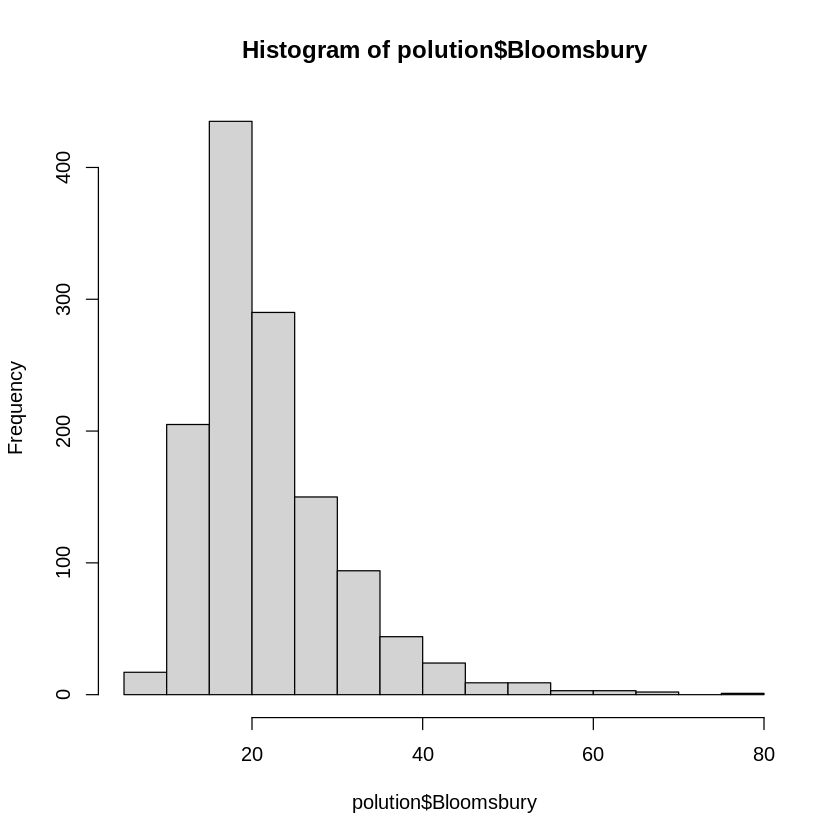

In [23]:

summary(polution)
hist(polution$Bloomsbury)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



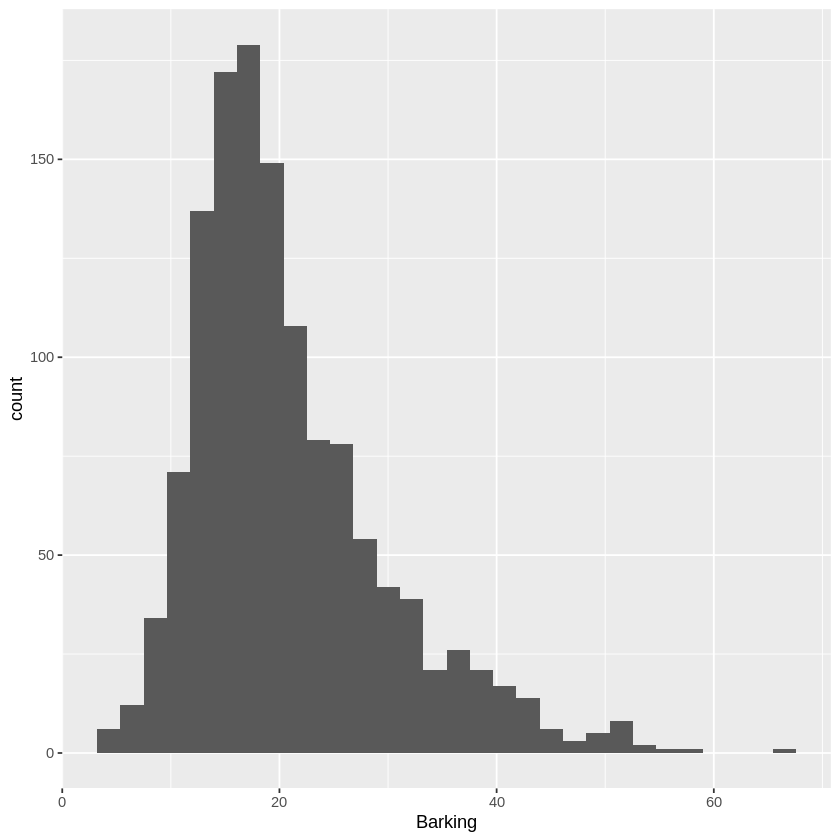

In [27]:
ggplot(polution, aes(x=Barking)) + geom_histogram()

WARN [2021-08-19 22:47:03] The timestamp column is not sorted! Sorting now
INFO [2021-08-19 22:47:03] Date has been selected as the timestamp column
INFO [2021-08-19 22:47:03] Bloomsbury, Barking has been selected as the numeric column(s)
INFO [2021-08-19 22:47:03]  has been selected as the state column(s)
INFO [2021-08-19 22:47:03] creating sample plot layers


Aligning plots

Plotting



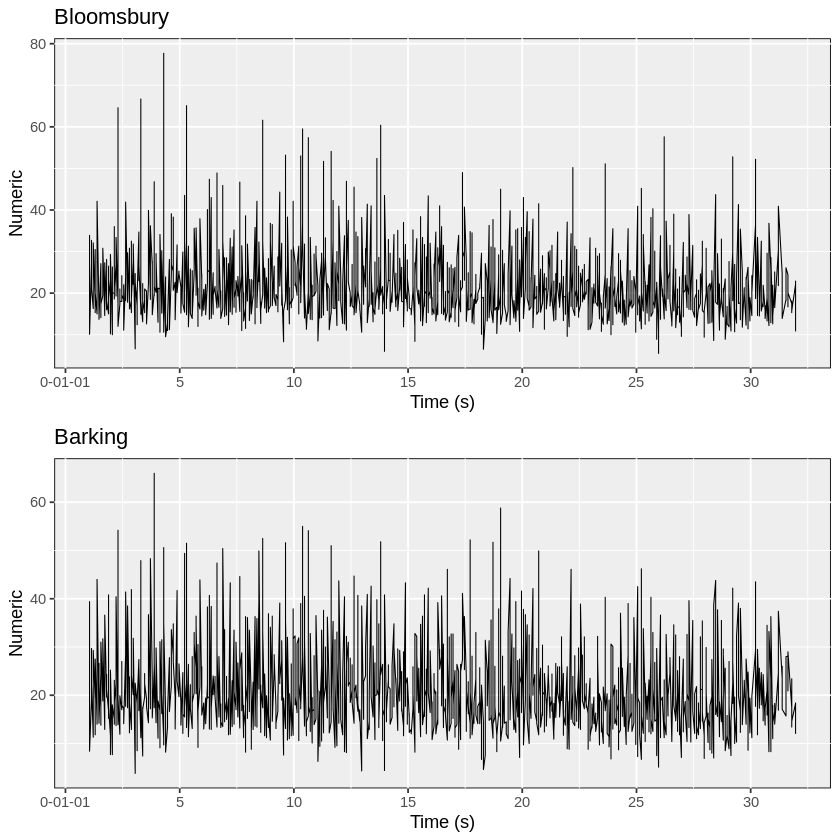

In [34]:
require(timelineR)
polution$Date = as.POSIXct(polution$Date)
plot_timeline <- plot_timeline(polution)

In [36]:

# split data

trainTestSplit <- function(polution,trainPercent,seed1){

smp_size <- floor(trainPerNew Sectioncent/100 * nrow(polution))

set.seed(seed1)
train_ind <- sample(seq_len(nrow(polution)), size = smp_size)
train_ind
}
train_ind <- trainTestSplit(polution,trainPercent=85,seed=123)
train <- polution[train_ind, ]
test <- polution[-train_ind, ]
head(polution)

,Date,Bloomsbury,Barking
,<dttm>,<dbl>,<dbl>
1,1-01-20,20.6,17.3
2,2-01-20,10.0,7.7
3,3-01-20,6.6,3.8
4,4-01-20,13.0,11.1
5,5-01-20,21.5,18.4
6,6-01-20,20.9,18.4


In [41]:
head(train)
tail(test)

,Date,Bloomsbury,Barking
,<dttm>,<dbl>,<dbl>
435,10-03-20,15.0,10.6
483,27-04-20,17.0,17.3
182,30-06-20,32.5,24.7
647,8-10-20,19.4,14.3
199,17-07-20,28.1,23.9
1469,8-01-20,13.4,33.5


,Date,Bloomsbury,Barking
,<dttm>,<dbl>,<dbl>
1787,21-11-20,14.9,16.3
1800,4-12-20,24.7,26.5
1803,7-12-20,31.8,36.1
1807,11-12-20,40.9,43.7
1814,18-12-20,16.0,16.6
1824,28-12-20,12.7,11.7


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.288  16.914  20.188  21.889  25.359  57.965 

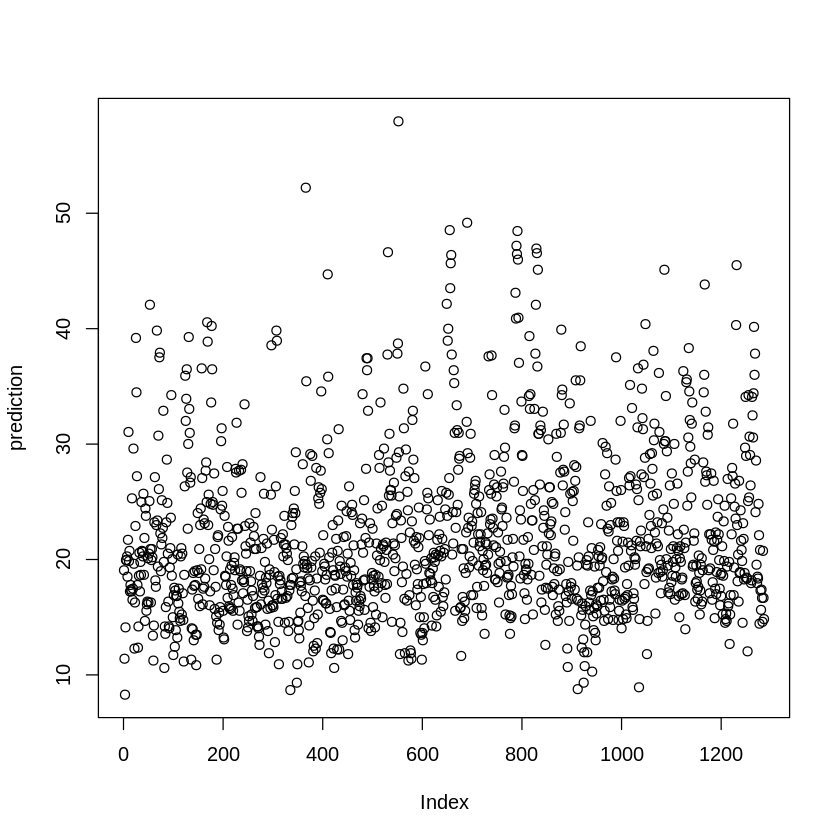

In [46]:

#fit Model
model <- lm(Bloomsbury ~ Barking, data = polution)
prediction <- predict(model, newdata = polution)
plot(prediction)
summary(prediction)

In [49]:

jags.mod <- function(){
B.pred[1] ~ dnorm(0, 1.0E-3)
for (i in 2 : N) {
Bloomsbury[i] ~ dnorm(B.pred[i],tau.v)
B.pred[i] ~ dnorm(B.pred[i-1], tau.w)
}
# priors
tau.w ~ dgamma(1,0.01)
sigma.w2 <- 1/tau.w
tau.v ~ dgamma(1,0.01)
sigma.v2 <- 1/tau.v
}



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.288  16.914  20.188  21.889  25.359  57.965 

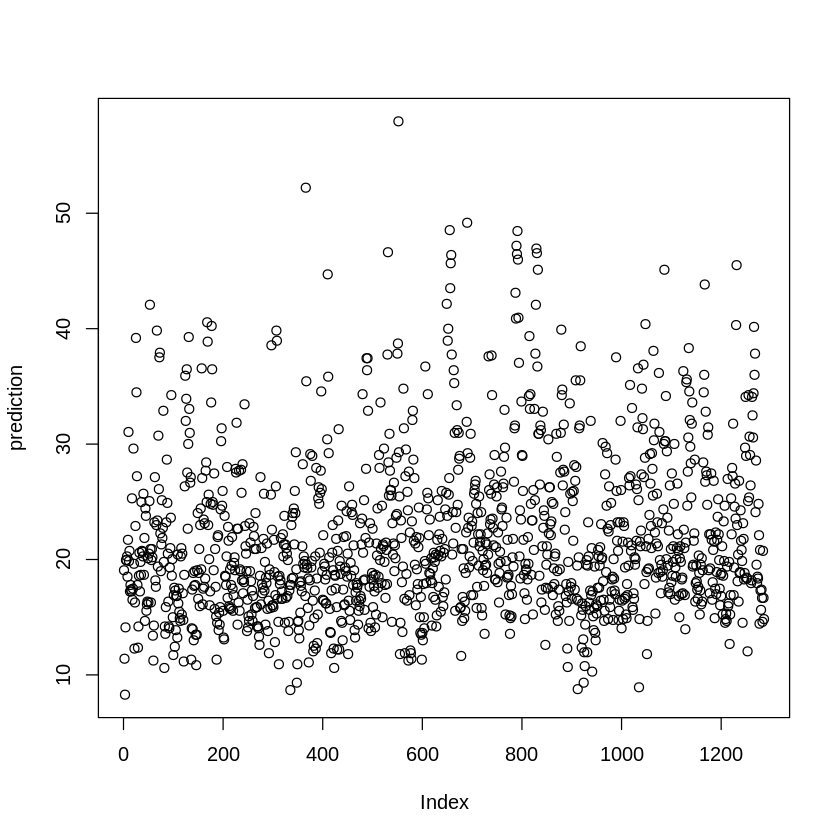

In [50]:

#fit Model
model <- lm(Bloomsbury ~ Barking, data = polution)
prediction <- predict(model, newdata = polution)
plot(prediction)
summary(prediction)

# Classification

In [79]:
install.packages("caret")
install.packages("MASS")
install.packages('e1071')
library(e1071)
library(caret)
library(MASS)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
classified <- read.csv("Classification.csv")
head(classified)

,X,X1,X2,Group
,<int>,<dbl>,<dbl>,<int>
1,1,-1.0079272,0.3990271,0
2,2,-0.4724797,0.8391218,1
3,3,0.7452293,-1.2797419,1
4,4,-0.5979079,-1.9424360,1
5,5,0.1869841,-1.5419103,1
6,6,-0.3957370,-0.1206505,1


In [56]:
# remove nas
classified <- na.omit(classified)
summary(classified)
# Findings
# All the X1 and X2 are int variables


       X                X1                  X2               Group      
 Min.   :   1.0   Min.   :-3.055858   Min.   :-3.41429   Min.   :0.000  
 1st Qu.: 250.8   1st Qu.:-0.679636   1st Qu.:-0.62566   1st Qu.:0.000  
 Median : 500.5   Median :-0.038071   Median : 0.01472   Median :1.000  
 Mean   : 500.5   Mean   : 0.002033   Mean   : 0.01631   Mean   :0.707  
 3rd Qu.: 750.2   3rd Qu.: 0.649037   3rd Qu.: 0.66946   3rd Qu.:1.000  
 Max.   :1000.0   Max.   : 3.285469   Max.   : 3.94396   Max.   :1.000  

'data.frame':	1000 obs. of  4 variables:
 $ X    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X1   : num  -1.008 -0.472 0.745 -0.598 0.187 ...
 $ X2   : num  0.399 0.839 -1.28 -1.942 -1.542 ...
 $ Group: int  0 1 1 1 1 1 0 1 1 1 ...


In [57]:
str(classified)

'data.frame':	1000 obs. of  4 variables:
 $ X    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X1   : num  -1.008 -0.472 0.745 -0.598 0.187 ...
 $ X2   : num  0.399 0.839 -1.28 -1.942 -1.542 ...
 $ Group: int  0 1 1 1 1 1 0 1 1 1 ...


In [59]:
# test and train
smp_size <- floor(0.80 * nrow(classified))

In [60]:
set.seed(123)
train_ind <- sample(seq_len(nrow(classified)), size = smp_size)

train <- classified[train_ind, ]
test <- classified[-train_ind, ]

In [65]:
preproc.parameter <- train %>% 
  preProcess(method = c("center", "scale"))
  
# Transform the data using the estimated parameters
train.transform <- preproc.parameter %>% predict(train)
test.transform <- preproc.parameter %>% predict(test)
head(train.transform)

,X,X1,X2,Group
,<dbl>,<dbl>,<dbl>,<dbl>
415,-0.2832246,0.06044537,-0.6204557,0.6445225
463,-0.1159583,0.98414431,0.3557821,-1.5495967
179,-1.1056174,1.29141018,-2.0664783,0.6445225
526,0.1035788,0.67882196,0.6941394,0.6445225
195,-1.0498619,-0.90515585,-1.6613536,0.6445225
938,1.5392815,-0.51031534,-0.4495272,0.6445225


In [75]:
model_lda <- lda(Group ~ X2, data = train.transform)
model_lda

Call:
lda(Group ~ X2, data = train.transform)

Prior probabilities of groups:
-1.54959672173117 0.644522530277568 
          0.29375           0.70625 

Group means:
                           X2
-1.54959672173117 -0.04224057
0.644522530277568  0.01756909

Coefficients of linear discriminants:
         LD1
X2 0.9997455

In [76]:
#Prediction 
# Quadratic discrimanant analysis
model_qda <- qda(Group ~ X2, data = train.transform)
model_qda
  

Call:
qda(Group ~ X2, data = train.transform)

Prior probabilities of groups:
-1.54959672173117 0.644522530277568 
          0.29375           0.70625 

Group means:
                           X2
-1.54959672173117 -0.04224057
0.644522530277568  0.01756909

In [78]:
# Logistic regression
model <- glm(Group ~.,family=binomial(link='logit'),data=train)
model


Call:  glm(formula = Group ~ ., family = binomial(link = "logit"), data = train)

Coefficients:
(Intercept)            X           X1           X2  
  0.9951135    0.0001075    1.0274554    0.1191050  

Degrees of Freedom: 799 Total (i.e. Null);  796 Residual
Null Deviance:	    968.8 
Residual Deviance: 838.2 	AIC: 846.2

In [81]:
# Support vector machines
classifier = svm(formula = Group ~ .,
                 data = train,
                 type = 'C-classification',
                 kernel = 'linear')
classifier


Call:
svm(formula = Group ~ ., data = train, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  480


In [94]:
train_x = train[, -1]
train_x = scale(train_x)[,]
train_y = train[,2]

test_x = test[, -1]
test_x = scale(test[,-1])[,]
test_y = test[,1]

knnmodel = knnreg(train_x, train_y)
 
summary(knnmodel)

        Length Class  Mode   
learn   2      -none- list   
k       1      -none- numeric
theDots 0      -none- list   

In [97]:
# predict
pred_y = predict(knnmodel, data.frame(test_x))
print(data.frame(test_y, pred_y))



    test_y       pred_y
1        1 -0.940641008
2        3  0.785017459
3        7 -0.303965069
4        9  0.774130490
5       12 -0.959968879
6       22  1.187247501
7       25  0.988562762
8       27  0.966990835
9       28 -0.876978495
10      32  0.509904045
11      35  0.568933081
12      43 -1.887401247
13      47  0.313804548
14      60  1.506180717
15      66  1.367382434
16      70  1.471930240
17      75  0.774119122
18      86  0.924966364
19      97  0.966604569
20     101  0.177060419
21     102 -0.633994154
22     103 -0.143532798
23     109 -0.372972591
24     126  0.804079714
25     133  0.624075151
26     140  0.177060419
27     144  0.660751240
28     145  2.035388043
29     147  1.956344226
30     149 -0.406581842
31     150  0.524663120
32     154  0.054764278
33     156  0.249423850
34     157  0.177060419
35     176 -0.217948369
36     182 -0.422358722
37     183  0.760768246
38     192  0.116375503
39     198 -0.007949766
40     202  1.341564729
41     208 -0.25

In [98]:
mse = mean((test_y - pred_y)^2)
mae = caret::MAE(test_y, pred_y)
rmse = caret::RMSE(test_y, pred_y)
cat("MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)

MSE:  355122.6 MAE:  517.3848  RMSE:  595.9216

In [101]:
# last question
cla <- read.csv("ClassificationTrue.csv")
set.seed(123)
train_ind <- sample(seq_len(nrow(cla)), size = smp_size)

train <- cla[train_ind, ]
test <- cla[-train_ind, ]
train_x = train[, -1]
train_x = scale(train_x)[,]
train_y = train[,2]

test_x = test[, -1]
test_x = scale(test[,-1])[,]
test_y = test[,1]

knnmodel = knnreg(train_x, train_y)
 
summary(knnmodel)

        Length Class  Mode   
learn   2      -none- list   
k       1      -none- numeric
theDots 0      -none- list   